<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/Mini%20Project3/MP3_Q1(1_2_13)_SVR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PART 2

In [1]:
#https://drive.google.com/file/d/1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o/view?usp=sharing
!gdown 1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o

Downloading...
From: https://drive.google.com/uc?id=1CAZXeWj3pUHU3sOPbAzpD6F91O1CQE4o
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100% 2.01M/2.01M [00:00<00:00, 66.8MB/s]


#1.2.2

In [2]:
import pandas as pd
df=pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


#1.2.3

In [3]:
# prompt: checking missing values

df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,2067
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [4]:
# prompt: fill missing values with imputatiom

# drop rows with missing values in 'pm2.5'
df = df.dropna(subset=['pm2.5'])

# fill missing values in other columns using interpolation
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

df.isnull().sum()


<ipython-input-4-ac4338cfaf9b>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
<ipython-input-4-ac4338cfaf9b>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


#1.2.4

In [5]:

for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].unique())

cbwd ['SE' 'cv' 'NW' 'NE']


In [6]:

df['cbwd_encoded'] = df['cbwd'].astype('category').cat.codes

print(df[['cbwd', 'cbwd_encoded']].head())
df

   cbwd  cbwd_encoded
24   SE             2
25   SE             2
26   SE             2
27   SE             2
28   SE             2


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,1
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,1
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,1
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,1


#1.2.5

In [7]:

columns_to_check = ['Iws', 'DEWP', 'TEMP', 'pm2.5']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of outliers: {len(outliers)}")
    print("-" * 20)

Column: Iws
  Q1: 1.79
  Q3: 21.91
  IQR: 20.12
  Lower Bound: -28.39
  Upper Bound: 52.09
  Number of outliers: 4893
--------------------
Column: DEWP
  Q1: -10.0
  Q3: 15.0
  IQR: 25.0
  Lower Bound: -47.5
  Upper Bound: 52.5
  Number of outliers: 0
--------------------
Column: TEMP
  Q1: 2.0
  Q3: 23.0
  IQR: 21.0
  Lower Bound: -29.5
  Upper Bound: 54.5
  Number of outliers: 0
--------------------
Column: pm2.5
  Q1: 29.0
  Q3: 137.0
  IQR: 108.0
  Lower Bound: -133.0
  Upper Bound: 299.0
  Number of outliers: 1773
--------------------


In [8]:

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = df[col].median()
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val

    print(f"Column: {col} (Outliers imputed with median)")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")

    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  Number of outliers after imputation: {len(outliers_after)}")
    print("-" * 20)

df.head()

Column: Iws (Outliers imputed with median)
  Q1: 1.79
  Q3: 21.91
  IQR: 20.12
  Lower Bound: -28.39
  Upper Bound: 52.09
  Number of outliers after imputation: 0
--------------------
Column: DEWP (Outliers imputed with median)
  Q1: -10.0
  Q3: 15.0
  IQR: 25.0
  Lower Bound: -47.5
  Upper Bound: 52.5
  Number of outliers after imputation: 0
--------------------
Column: TEMP (Outliers imputed with median)
  Q1: 2.0
  Q3: 23.0
  IQR: 21.0
  Lower Bound: -29.5
  Upper Bound: 54.5
  Number of outliers after imputation: 0
--------------------
Column: pm2.5 (Outliers imputed with median)
  Q1: 29.0
  Q3: 137.0
  IQR: 108.0
  Lower Bound: -133.0
  Upper Bound: 299.0
  Number of outliers after imputation: 0
--------------------


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2


#1.2.6

In [9]:
import pandas as pd

def classify_pm25(pm25_value):
    """
    Classifies PM2.5 value into AQI categories based on provided breakpoints.
    """
    if 0.0 <= pm25_value <= 12.0:
        return "Good"
    elif 12.1 <= pm25_value <= 35.4:
        return "Moderate"
    elif 35.5 <= pm25_value <= 55.4:
        return "Unhealthy for Sensitive Groups"
    elif 55.5 <= pm25_value <= 150.4:
        return "Unhealthy"
    elif 150.5 <= pm25_value <= 250.4:
        return "Very Unhealthy"
    elif 250.5 <= pm25_value <= 350.4:
        return "Hazardous"
    elif 350.5 <= pm25_value <= 500.0:
        return "Hazardous"  # Assuming values above 350.5 are also Hazardous
    else:
        return "Out of Range"  # Handle cases outside the defined ranges

# Assuming your DataFrame is called df_filled and has a 'pm2.5' column
df['AQI Category'] = df['pm2.5'].apply(classify_pm25)

# Now df_filled will have a new column called 'AQI Category' with the classifications
print(df[['pm2.5', 'AQI Category']].head())
df

    pm2.5    AQI Category
24  129.0       Unhealthy
25  148.0       Unhealthy
26  159.0  Very Unhealthy
27  181.0  Very Unhealthy
28  138.0       Unhealthy


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2,Unhealthy
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2,Unhealthy
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2,Very Unhealthy
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2,Very Unhealthy
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,5.37,0,0,1,Good
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,5.37,0,0,1,Good
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,5.37,0,0,1,Good
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,5.37,0,0,1,Good


#1.2.7

##Lag

In [10]:

def add_lagged_columns(df, lag_hours):

  for lag in lag_hours:
    df[f'pm2.5_lag_{lag}h'] = df['pm2.5'].shift(lag)
  return df

df = add_lagged_columns(df, [2, 24])

print(df[['pm2.5', 'pm2.5_lag_2h', 'pm2.5_lag_24h']].head())
df


    pm2.5  pm2.5_lag_2h  pm2.5_lag_24h
24  129.0           NaN            NaN
25  148.0           NaN            NaN
26  159.0         129.0            NaN
27  181.0         148.0            NaN
28  138.0         159.0            NaN


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category,pm2.5_lag_2h,pm2.5_lag_24h
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2,Unhealthy,NaN,NaN
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2,Unhealthy,NaN,NaN
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2,Very Unhealthy,129.0,NaN
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2,Very Unhealthy,148.0,NaN
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2,Unhealthy,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,5.37,0,0,1,Good,9.0,35.0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,10.0,26.0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,8.0,20.0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,5.37,0,0,1,Good,10.0,8.0


In [11]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [12]:
df = df.dropna(subset=['pm2.5_lag_2h'])
df['pm2.5_lag_24h'] = df['pm2.5_lag_24h'].fillna(method='ffill')
df['pm2.5_lag_24h'] = df['pm2.5_lag_24h'].fillna(method='bfill')

df.isnull().sum()
df

<ipython-input-12-30584536b5e1>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_lag_24h'] = df['pm2.5_lag_24h'].fillna(method='ffill')
<ipython-input-12-30584536b5e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pm2.5_lag_24h'] = df['pm2.5_lag_24h'].fillna(method='ffill')
<ipython-input-12-30584536b5e1>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_lag_24h'] = df['pm2.5_lag_24h'].fillna(method='bfill')
<ipython-input-12-30584536b5e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category,pm2.5_lag_2h,pm2.5_lag_24h
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2,Very Unhealthy,129.0,129.0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2,Very Unhealthy,148.0,129.0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2,Unhealthy,159.0,129.0
29,30,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0,2,Unhealthy,181.0,129.0
30,31,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0,2,Unhealthy,138.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,5.37,0,0,1,Good,9.0,35.0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,10.0,26.0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,8.0,20.0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,5.37,0,0,1,Good,10.0,8.0


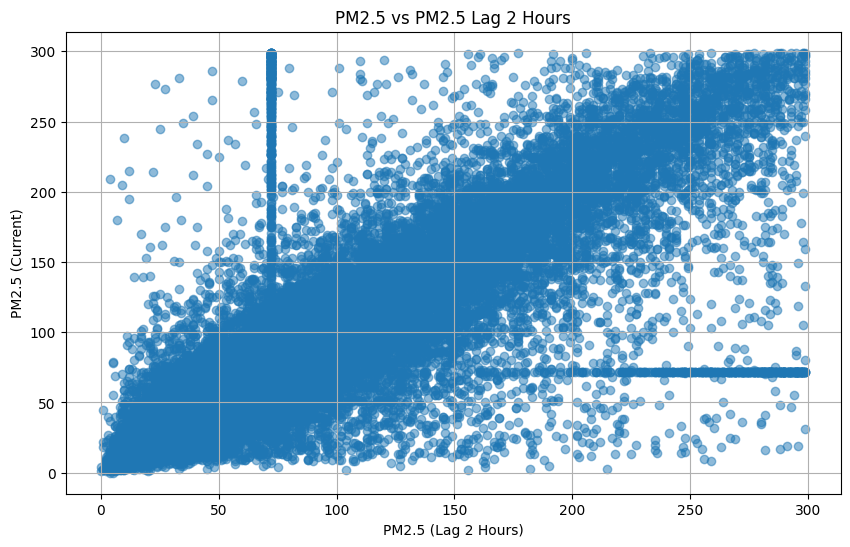

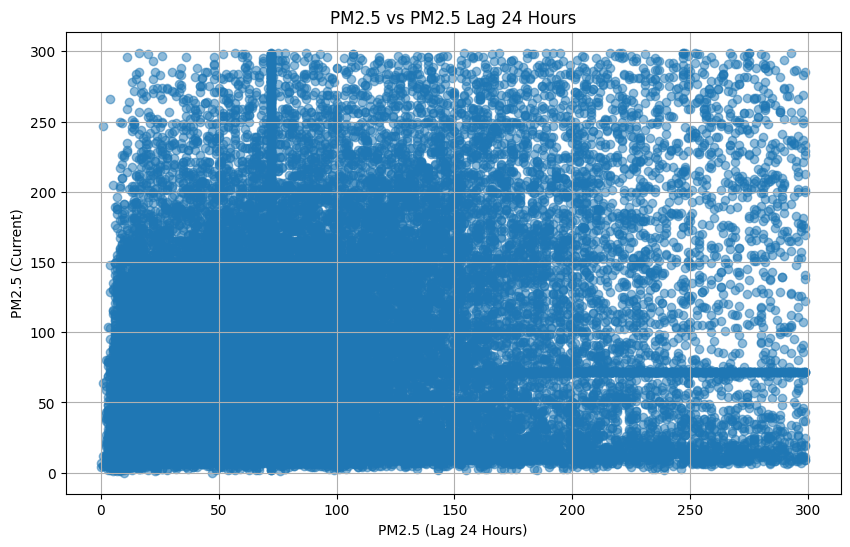

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['pm2.5_lag_2h'], df['pm2.5'], alpha=0.5)
plt.title('PM2.5 vs PM2.5 Lag 2 Hours')
plt.xlabel('PM2.5 (Lag 2 Hours)')
plt.ylabel('PM2.5 (Current)')
plt.grid(True)
plt.show()

# Plotting lag 24 hours
plt.figure(figsize=(10, 6))
plt.scatter(df['pm2.5_lag_24h'], df['pm2.5'], alpha=0.5)
plt.title('PM2.5 vs PM2.5 Lag 24 Hours')
plt.xlabel('PM2.5 (Lag 24 Hours)')
plt.ylabel('PM2.5 (Current)')
plt.grid(True)
plt.show()


Correlation Matrix:
                  pm2.5  pm2.5_lag_2h  pm2.5_lag_24h
pm2.5          1.000000      0.835598       0.264249
pm2.5_lag_2h   0.835598      1.000000       0.292411
pm2.5_lag_24h  0.264249      0.292411       1.000000


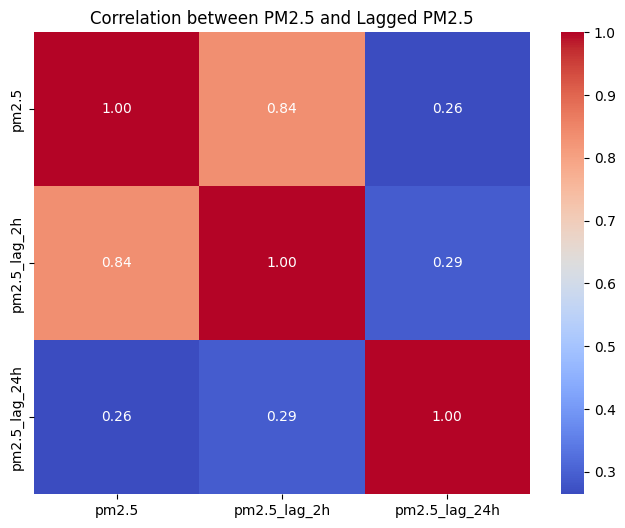

In [14]:
import seaborn as sns

correlation_matrix = df[['pm2.5', 'pm2.5_lag_2h', 'pm2.5_lag_24h']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between PM2.5 and Lagged PM2.5')
plt.show()

##Rolling Statistics

In [15]:
# prompt: rolling statistics for pm2.5

# Calculate rolling mean and standard deviation for 'pm2.5' with a window of 24 hours
window_size = 24
df['pm2.5_rolling_mean'] = df['pm2.5'].rolling(window=window_size).mean()
df['pm2.5_rolling_std'] = df['pm2.5'].rolling(window=window_size).std()

print(df[['pm2.5', 'pm2.5_rolling_mean', 'pm2.5_rolling_std']].head())
print(df[['pm2.5', 'pm2.5_rolling_mean', 'pm2.5_rolling_std']].tail())
df

<ipython-input-15-7f3f6b33d377>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pm2.5_rolling_mean'] = df['pm2.5'].rolling(window=window_size).mean()
<ipython-input-15-7f3f6b33d377>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pm2.5_rolling_std'] = df['pm2.5'].rolling(window=window_size).std()


    pm2.5  pm2.5_rolling_mean  pm2.5_rolling_std
26  159.0                 NaN                NaN
27  181.0                 NaN                NaN
28  138.0                 NaN                NaN
29  109.0                 NaN                NaN
30  105.0                 NaN                NaN
       pm2.5  pm2.5_rolling_mean  pm2.5_rolling_std
43819    8.0           11.291667           4.903230
43820   10.0           10.625000           3.774197
43821   10.0           10.208333           3.202976
43822    8.0           10.208333           3.202976
43823   12.0           10.041667           2.985169


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category,pm2.5_lag_2h,pm2.5_lag_24h,pm2.5_rolling_mean,pm2.5_rolling_std
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2,Very Unhealthy,129.0,129.0,NaN,NaN
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2,Very Unhealthy,148.0,129.0,NaN,NaN
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2,Unhealthy,159.0,129.0,NaN,NaN
29,30,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0,2,Unhealthy,181.0,129.0,NaN,NaN
30,31,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0,2,Unhealthy,138.0,129.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,5.37,0,0,1,Good,9.0,35.0,11.291667,4.903230
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,10.0,26.0,10.625000,3.774197
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,5.37,0,0,1,Good,8.0,20.0,10.208333,3.202976
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,5.37,0,0,1,Good,10.0,8.0,10.208333,3.202976


In [16]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [17]:


df['pm2.5_rolling_mean'] = df['pm2.5_rolling_mean'].fillna(method='ffill')
df['pm2.5_rolling_mean'] = df['pm2.5_rolling_mean'].fillna(method='bfill')
df['pm2.5_rolling_std'] = df['pm2.5_rolling_std'].fillna(method='ffill')
df['pm2.5_rolling_std'] = df['pm2.5_rolling_std'].fillna(method='bfill')

df.isnull().sum()


<ipython-input-17-513a06556fb8>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_rolling_mean'] = df['pm2.5_rolling_mean'].fillna(method='ffill')
<ipython-input-17-513a06556fb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pm2.5_rolling_mean'] = df['pm2.5_rolling_mean'].fillna(method='ffill')
<ipython-input-17-513a06556fb8>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['pm2.5_rolling_mean'] = df['pm2.5_rolling_mean'].fillna(method='bfill')
<ipython-input-17-513a06556fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [18]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_encoded,AQI Category,pm2.5_lag_2h,pm2.5_lag_24h,pm2.5_rolling_mean,pm2.5_rolling_std
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2,Very Unhealthy,129.0,129.0,140.791667,27.828636
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2,Very Unhealthy,148.0,129.0,140.791667,27.828636
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2,Unhealthy,159.0,129.0,140.791667,27.828636
29,30,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0,2,Unhealthy,181.0,129.0,140.791667,27.828636
30,31,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0,2,Unhealthy,138.0,129.0,140.791667,27.828636


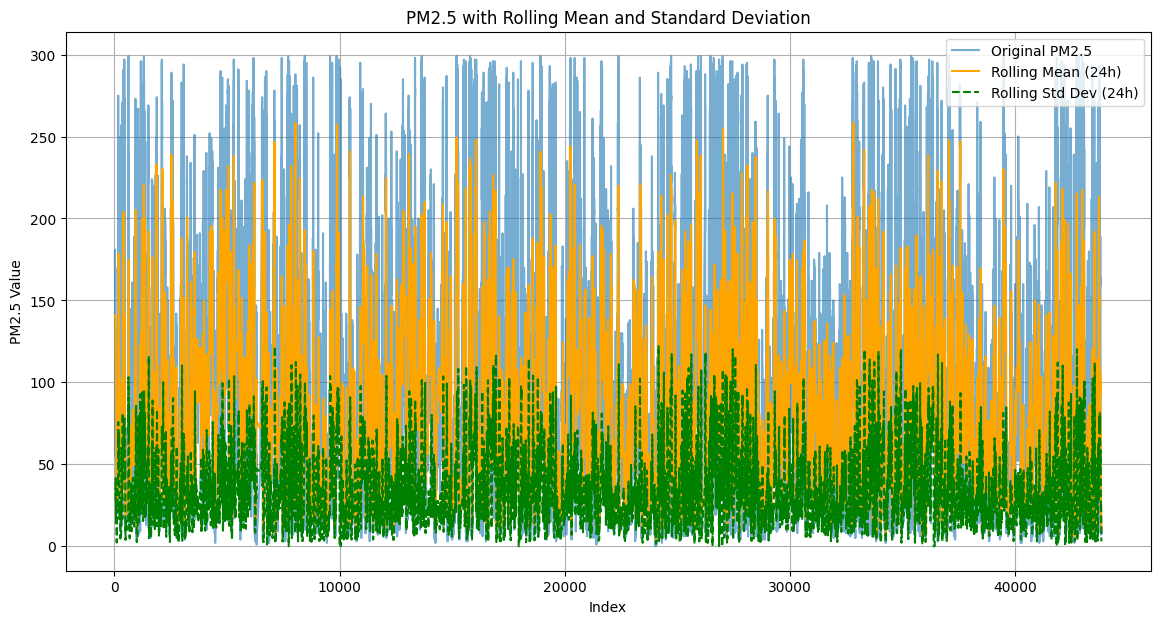

In [19]:
# Plotting the rolling statistics
plt.figure(figsize=(14, 7))

# Plot the original PM2.5 data
plt.plot(df.index, df['pm2.5'], label='Original PM2.5', alpha=0.6)

# Plot the rolling mean
plt.plot(df.index, df['pm2.5_rolling_mean'], label=f'Rolling Mean ({window_size}h)', color='orange')

# Plot the rolling standard deviation
plt.plot(df.index, df['pm2.5_rolling_std'], label=f'Rolling Std Dev ({window_size}h)', color='green', linestyle='--')

plt.title('PM2.5 with Rolling Mean and Standard Deviation')
plt.xlabel('Index') # Assuming your index is time-based, you might want to set it as datetime index
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(True)
plt.show()

##Cyclic Encoding

In [20]:
def encode_cyclic(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

import numpy as np
df = encode_cyclic(df, 'year', df['year'].max())
df = encode_cyclic(df, 'month', 12)
df = encode_cyclic(df, 'day', 31)
df = encode_cyclic(df, 'hour', 23)

print(df[['year', 'year_sin', 'year_cos',
          'month', 'month_sin', 'month_cos',
          'day', 'day_sin', 'day_cos',
          'hour', 'hour_sin', 'hour_cos']].head())

df.head()

    year  year_sin  year_cos  month  month_sin  month_cos  day   day_sin  \
26  2010 -0.012479  0.999922      1        0.5   0.866025    2  0.394356   
27  2010 -0.012479  0.999922      1        0.5   0.866025    2  0.394356   
28  2010 -0.012479  0.999922      1        0.5   0.866025    2  0.394356   
29  2010 -0.012479  0.999922      1        0.5   0.866025    2  0.394356   
30  2010 -0.012479  0.999922      1        0.5   0.866025    2  0.394356   

     day_cos  hour  hour_sin  hour_cos  
26  0.918958     2  0.519584  0.854419  
27  0.918958     3  0.730836  0.682553  
28  0.918958     4  0.887885  0.460065  
29  0.918958     5  0.979084  0.203456  
30  0.918958     6  0.997669 -0.068242  


<ipython-input-20-662536276882>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
<ipython-input-20-662536276882>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
<ipython-input-20-662536276882>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,...,pm2.5_rolling_mean,pm2.5_rolling_std,year_sin,year_cos,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,...,140.791667,27.828636,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.519584,0.854419
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,...,140.791667,27.828636,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.730836,0.682553
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,...,140.791667,27.828636,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.887885,0.460065
29,30,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,...,140.791667,27.828636,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.979084,0.203456
30,31,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,...,140.791667,27.828636,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.997669,-0.068242


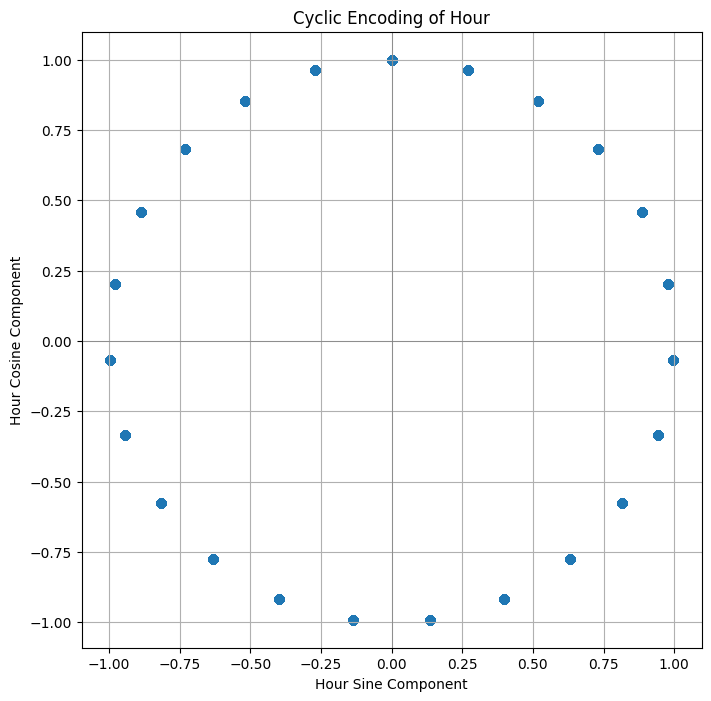

In [21]:

plt.figure(figsize=(8, 8))
plt.scatter(df['hour_sin'], df['hour_cos'], alpha=0.5)
plt.title('Cyclic Encoding of Hour')
plt.xlabel('Hour Sine Component')
plt.ylabel('Hour Cosine Component')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()

##Advanced time series features

In [22]:
def get_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Autumn'

df['season'] = df['month'].apply(get_season)
print(df[['month', 'season']].head())
print(df[['month', 'season']].tail())
df

<ipython-input-22-ef5bc306b439>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['month'].apply(get_season)


    month  season
26      1  Winter
27      1  Winter
28      1  Winter
29      1  Winter
30      1  Winter
       month  season
43819     12  Winter
43820     12  Winter
43821     12  Winter
43822     12  Winter
43823     12  Winter


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,...,pm2.5_rolling_std,year_sin,year_cos,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,season
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,...,27.828636,-1.247869e-02,0.999922,5.000000e-01,0.866025,3.943559e-01,0.918958,5.195840e-01,0.854419,Winter
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,...,27.828636,-1.247869e-02,0.999922,5.000000e-01,0.866025,3.943559e-01,0.918958,7.308360e-01,0.682553,Winter
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,...,27.828636,-1.247869e-02,0.999922,5.000000e-01,0.866025,3.943559e-01,0.918958,8.878852e-01,0.460065,Winter
29,30,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,...,27.828636,-1.247869e-02,0.999922,5.000000e-01,0.866025,3.943559e-01,0.918958,9.790841e-01,0.203456,Winter
30,31,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,...,27.828636,-1.247869e-02,0.999922,5.000000e-01,0.866025,3.943559e-01,0.918958,9.976688e-01,-0.068242,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,...,4.903230,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-8.878852e-01,0.460065,Winter
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,...,3.774197,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-7.308360e-01,0.682553,Winter
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,...,3.202976,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-5.195840e-01,0.854419,Winter
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,...,3.202976,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.697968e-01,0.962917,Winter


Proportion of AQI Categories by Season:
AQI Category      Good  Hazardous  Moderate  Unhealthy  \
season                                                   
Autumn        0.118314   0.044848  0.191299   0.386248   
Spring        0.071523   0.020908  0.211637   0.430937   
Summer        0.043411   0.013091  0.172298   0.478006   
Winter        0.091303   0.043918  0.261389   0.372821   

AQI Category  Unhealthy for Sensitive Groups  Very Unhealthy  
season                                                        
Autumn                              0.111879        0.147412  
Spring                              0.134626        0.130369  
Summer                              0.140341        0.152854  
Winter                              0.092170        0.138399  

Pollution Score (Sum of Proportions of Unhealthy, Very Unhealthy, Hazardous) by Season:
season
Autumn    0.578508
Spring    0.582214
Summer    0.643950
Winter    0.555138
dtype: float64

Season with the most pollution (highest propo

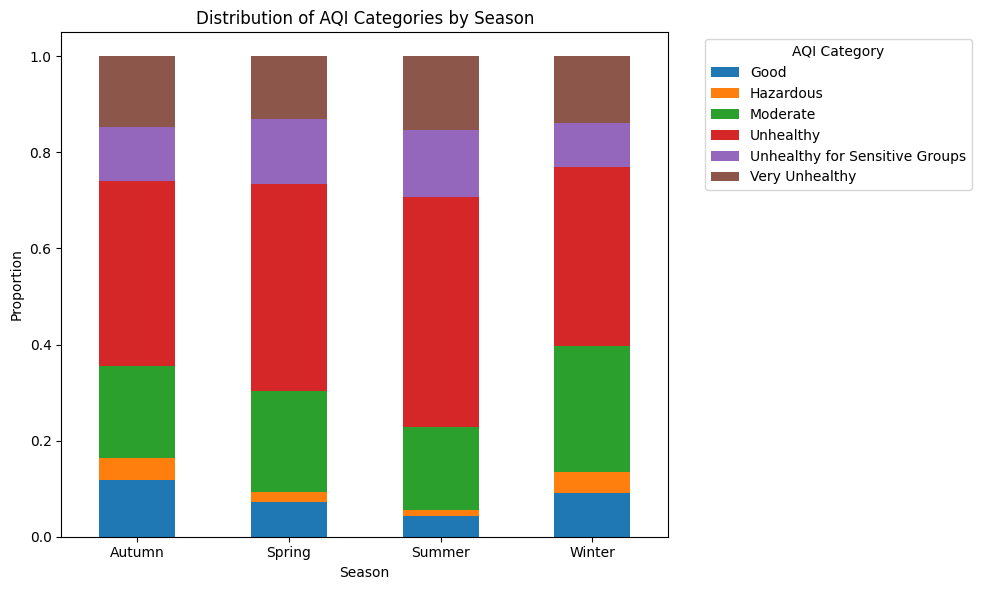

In [23]:

season_aqi_counts = df.groupby('season')['AQI Category'].value_counts(normalize=True).unstack(fill_value=0)

print("Proportion of AQI Categories by Season:")
print(season_aqi_counts)
polluted_categories = ['Unhealthy', 'Very Unhealthy', 'Hazardous']
season_pollution_score = season_aqi_counts[polluted_categories].sum(axis=1)

print("\nPollution Score (Sum of Proportions of Unhealthy, Very Unhealthy, Hazardous) by Season:")
print(season_pollution_score)

most_polluted_season = season_pollution_score.idxmax()

print(f"\nSeason with the most pollution (highest proportion of Unhealthy+): {most_polluted_season}")

# Optional: Visualize the AQI distribution by season
season_aqi_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of AQI Categories by Season')
plt.xlabel('Season')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Correlation Matrix between PM2.5 and Environmental Factors:
          pm2.5       Iws      TEMP
pm2.5  1.000000 -0.114719  0.011852
Iws   -0.114719  1.000000  0.097304
TEMP   0.011852  0.097304  1.000000


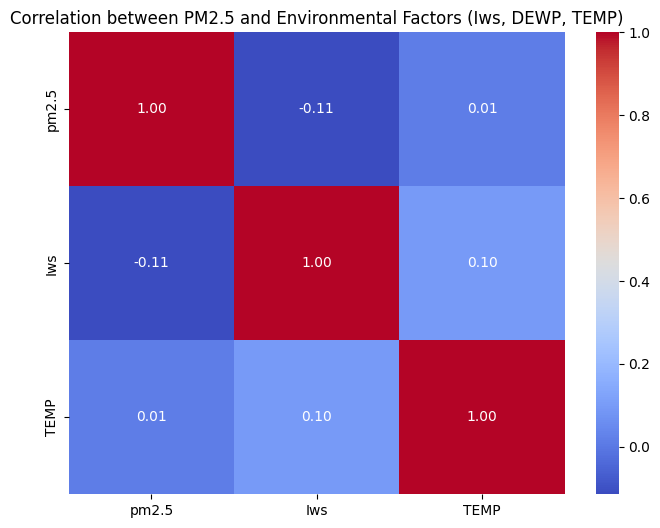

In [24]:
correlation_matrix_environmental = df[['pm2.5', 'Iws', 'TEMP']].corr()
print("Correlation Matrix between PM2.5 and Environmental Factors:")
print(correlation_matrix_environmental)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_environmental, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between PM2.5 and Environmental Factors (Iws, DEWP, TEMP)')
plt.show()

#1.2.8

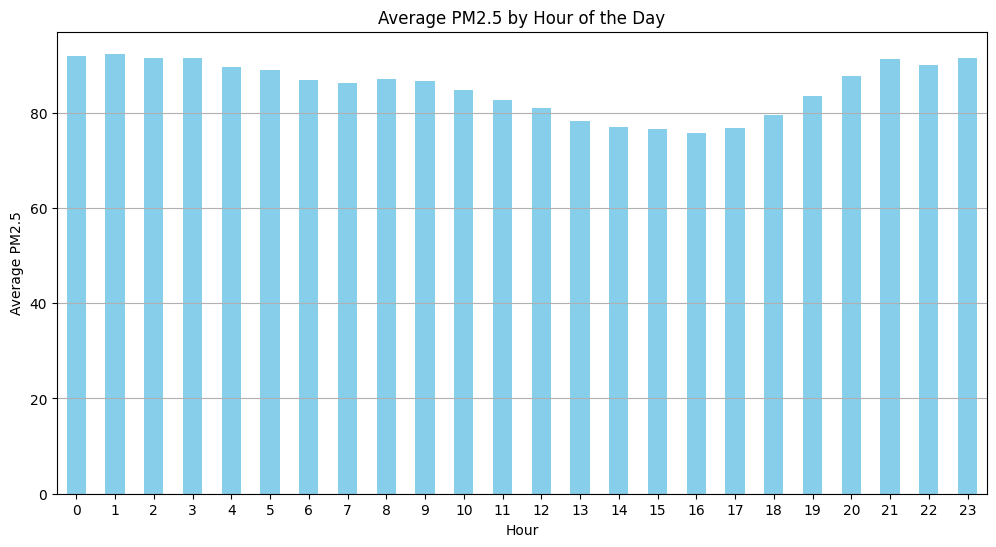

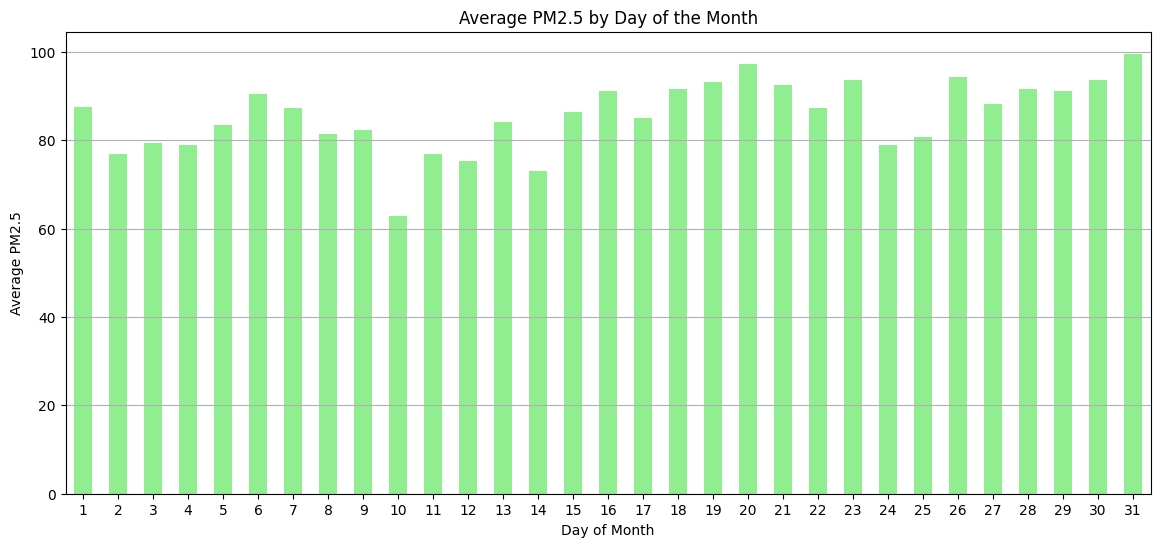

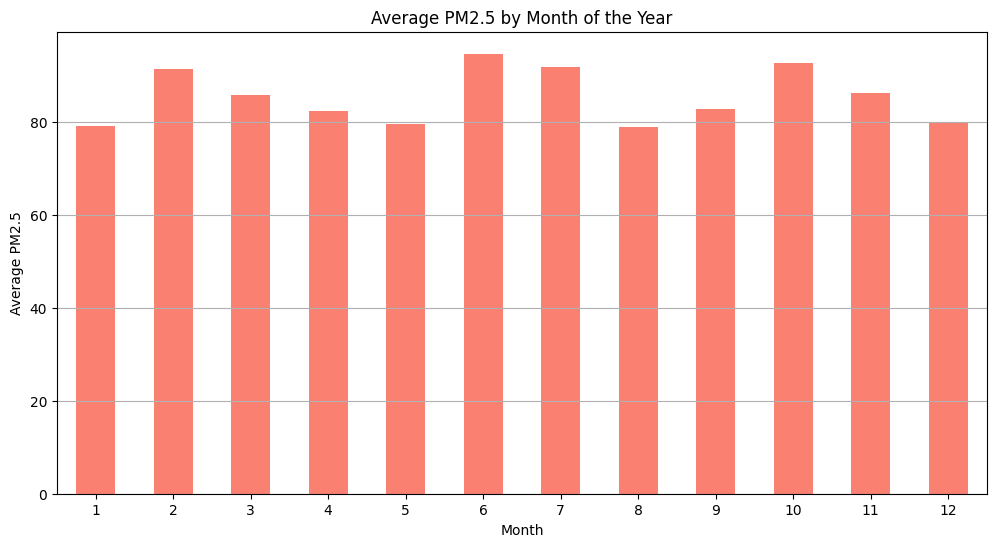

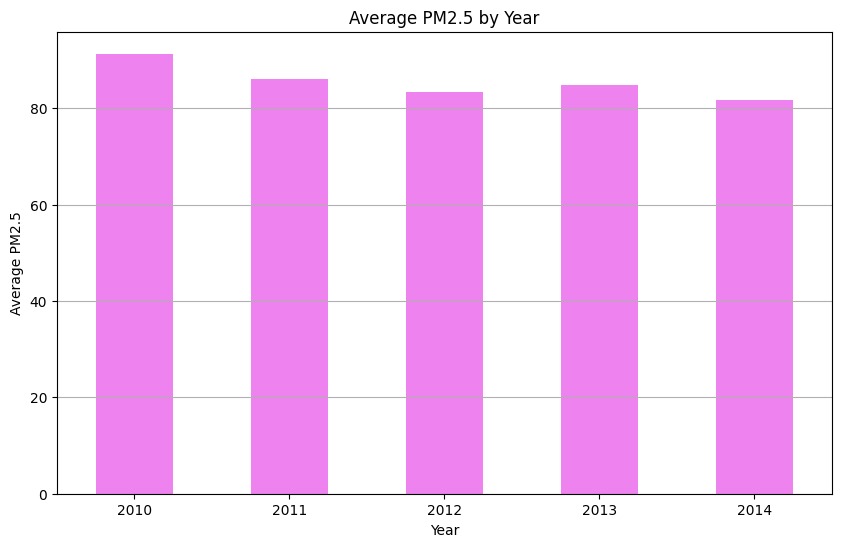

In [25]:
# prompt: pm2.5 plot hour ,day ,month ,year

# Group by hour and calculate the mean PM2.5
hourly_pm25 = df.groupby('hour')['pm2.5'].mean()

plt.figure(figsize=(12, 6))
hourly_pm25.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Group by day and calculate the mean PM2.5
# Assuming you have a 'dayofweek' column or similar, otherwise using the 'day' column which is day of month
# If you don't have day of week, you might need to create it from your date column
# df['dayofweek'] = pd.to_datetime(df[['year', 'month', 'day']]).dt.dayofweek
# day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# df['day_name'] = df['dayofweek'].map(lambda x: day_names[x])
# daily_pm25 = df.groupby('day_name')['pm2.5'].mean().reindex(day_names) # reindex to ensure correct order

# If using 'day' as day of month:
daily_pm25 = df.groupby('day')['pm2.5'].mean()

plt.figure(figsize=(14, 6))
daily_pm25.plot(kind='bar', color='lightgreen')
plt.title('Average PM2.5 by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# Group by month and calculate the mean PM2.5
monthly_pm25 = df.groupby('month')['pm2.5'].mean()

plt.figure(figsize=(12, 6))
monthly_pm25.plot(kind='bar', color='salmon')
plt.title('Average PM2.5 by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Group by year and calculate the mean PM2.5
yearly_pm25 = df.groupby('year')['pm2.5'].mean()

plt.figure(figsize=(10, 6))
yearly_pm25.plot(kind='bar', color='violet')
plt.title('Average PM2.5 by Year')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [26]:
# prompt: add a new column for showing year	month	day	hour in one

df['year_month_day_hour'] = df['year'].astype(str) + '-' + \
                            df['month'].astype(str).str.zfill(2) + '-' + \
                            df['day'].astype(str).str.zfill(2) + ' ' + \
                            df['hour'].astype(str).str.zfill(2)

df.head()

<ipython-input-26-963c2105aa24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month_day_hour'] = df['year'].astype(str) + '-' + \


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,...,year_sin,year_cos,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,season,year_month_day_hour
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,...,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.519584,0.854419,Winter,2010-01-02 02
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,...,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.730836,0.682553,Winter,2010-01-02 03
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,...,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.887885,0.460065,Winter,2010-01-02 04
29,30,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,...,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.979084,0.203456,Winter,2010-01-02 05
30,31,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,...,-0.012479,0.999922,0.5,0.866025,0.394356,0.918958,0.997669,-0.068242,Winter,2010-01-02 06


<ipython-input-27-79611104abb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month_day_hour'] = pd.to_datetime(df['year_month_day_hour'])


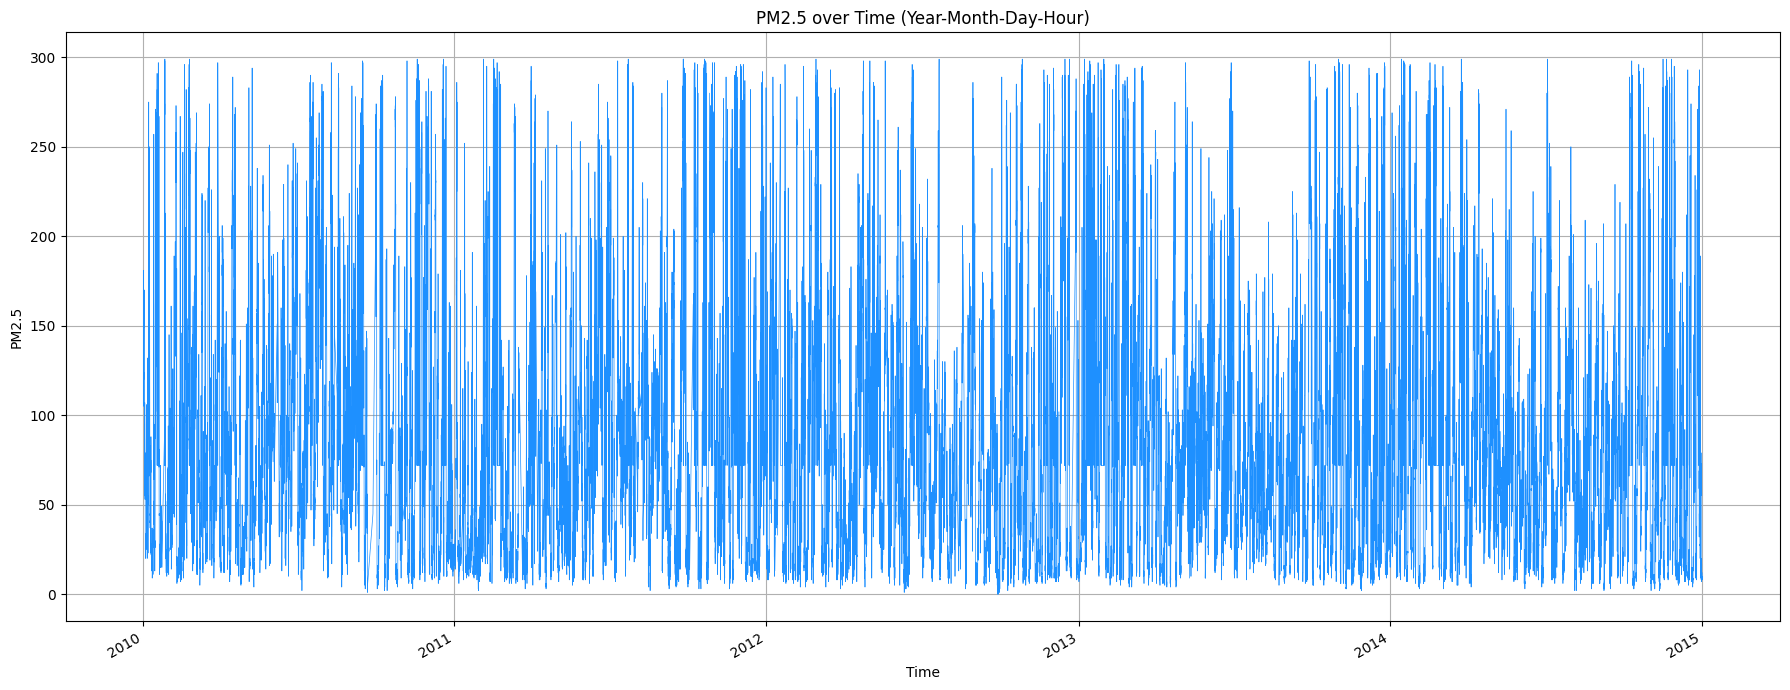

In [27]:

df['year_month_day_hour'] = pd.to_datetime(df['year_month_day_hour'])
df_sorted = df.sort_values(by='year_month_day_hour')

df_sorted = df_sorted.set_index('year_month_day_hour')

plt.figure(figsize=(18, 7))
df_sorted['pm2.5'].plot(linewidth=0.5, color='dodgerblue')
plt.title('PM2.5 over Time (Year-Month-Day-Hour)')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout() #
plt.show()

##Maximum airpolution date/dates

In [28]:

max_pm25_datetime = df_sorted['pm2.5'].idxmax()
max_pm25_value = df_sorted['pm2.5'].max()

print(f"The maximum PM2.5 value of {max_pm25_value:.2f} occurred at {max_pm25_datetime}")

top_n = 10
top_pm25_dates = df_sorted['pm2.5'].nlargest(top_n)

print(f"\nTop {top_n} dates and times with the highest PM2.5 values:")
top_pm25_dates

The maximum PM2.5 value of 299.00 occurred at 2010-01-27 00:00:00

Top 10 dates and times with the highest PM2.5 values:


,pm2.5
year_month_day_hour,
2010-01-27 00:00:00,299.0
2010-02-24 17:00:00,299.0
2010-11-18 12:00:00,299.0
2010-12-19 04:00:00,299.0
2011-02-04 00:00:00,299.0
2011-02-16 02:00:00,299.0
2011-07-23 14:00:00,299.0
2011-09-26 00:00:00,299.0
2011-09-26 02:00:00,299.0


##January or December?

In [29]:
# Get the average PM2.5 for January and December
january_pm25 = monthly_pm25[1]
december_pm25 = monthly_pm25[12]
if january_pm25 < december_pm25:
  print(f"January has the least average PM2.5 ({january_pm25:.2f}) compared to December ({december_pm25:.2f}).")
elif december_pm25 < january_pm25:
  print(f"December has the least average PM2.5 ({december_pm25:.2f}) compared to January ({january_pm25:.2f}).")
else:
  print(f"January and December have the same average PM2.5 ({january_pm25:.2f}).")


January has the least average PM2.5 (79.17) compared to December (79.67).


#1.2.10

##Normalize

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_numeric = df.drop(['cbwd', 'AQI Category', 'year_month_day_hour', 'season'], axis=1)

df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

print("Normalized DataFrame (StandardScaler):")
print(df_scaled.head())

df_scaled.info()
df_scaled

Normalized DataFrame (StandardScaler):
         No      year     month       day      hour     pm2.5      DEWP  \
0 -1.758140 -1.443462 -1.596403 -1.557878 -1.372348  1.083075 -0.883441   
1 -1.758061 -1.443462 -1.596403 -1.557878 -1.227933  1.406829 -0.606305   
2 -1.757982 -1.443462 -1.596403 -1.557878 -1.083519  0.774038 -0.606305   
3 -1.757903 -1.443462 -1.596403 -1.557878 -0.939104  0.347273 -0.606305   
4 -1.757824 -1.443462 -1.596403 -1.557878 -0.794690  0.288409 -0.606305   

       TEMP      PRES       Iws  ...  pm2.5_rolling_mean  pm2.5_rolling_std  \
0 -1.429371  0.442418 -0.503055  ...            1.042479           -0.34748   
1 -1.429371  0.539498 -0.342958  ...            1.042479           -0.34748   
2 -1.429371  0.539498 -0.263357  ...            1.042479           -0.34748   
3 -1.511507  0.539498 -0.183755  ...            1.042479           -0.34748   
4 -1.511507  0.636578 -0.023658  ...            1.042479           -0.34748   

   year_sin  year_cos  month_sin  m

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,...,pm2.5_rolling_mean,pm2.5_rolling_std,year_sin,year_cos,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
0,-1.758140,-1.443462,-1.596403,-1.557878,-1.372348,1.083075,-0.883441,-1.429371,0.442418,-0.503055,...,1.042479,-0.347480,-1.443446,-1.730044,0.707531,1.220261,0.543708,1.340412,0.750721,1.127399
1,-1.758061,-1.443462,-1.596403,-1.557878,-1.227933,1.406829,-0.606305,-1.429371,0.539498,-0.342958,...,1.042479,-0.347480,-1.443446,-1.730044,0.707531,1.220261,0.543708,1.340412,1.055783,0.888755
2,-1.757982,-1.443462,-1.596403,-1.557878,-1.083519,0.774038,-0.606305,-1.429371,0.539498,-0.263357,...,1.042479,-0.347480,-1.443446,-1.730044,0.707531,1.220261,0.543708,1.340412,1.282572,0.579819
3,-1.757903,-1.443462,-1.596403,-1.557878,-0.939104,0.347273,-0.606305,-1.511507,0.539498,-0.183755,...,1.042479,-0.347480,-1.443446,-1.730044,0.707531,1.220261,0.543708,1.340412,1.414269,0.223505
4,-1.757824,-1.443462,-1.596403,-1.557878,-0.794690,0.288409,-0.606305,-1.511507,0.636578,-0.023658,...,1.042479,-0.347480,-1.443446,-1.730044,0.707531,1.220261,0.543708,1.340412,1.441107,-0.153762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41750,1.701738,1.382880,1.588283,1.743153,1.082699,-1.139049,-1.714849,-1.182961,1.704453,-0.342064,...,-1.396365,-1.307306,1.382892,0.992648,-0.002329,1.409001,-0.010206,1.455880,-1.281759,0.579819
41751,1.701817,1.382880,1.588283,1.743153,1.227114,-1.109616,-1.645565,-1.265097,1.704453,-0.342064,...,-1.408921,-1.354575,1.382892,0.992648,-0.002329,1.409001,-0.010206,1.455880,-1.054969,0.888755
41752,1.701896,1.382880,1.588283,1.743153,1.371528,-1.109616,-1.645565,-1.265097,1.704453,-0.342064,...,-1.416768,-1.378491,1.382892,0.992648,-0.002329,1.409001,-0.010206,1.455880,-0.749907,1.127399
41753,1.701975,1.382880,1.588283,1.743153,1.515943,-1.139049,-1.645565,-1.347234,1.704453,-0.342064,...,-1.416768,-1.378491,1.382892,0.992648,-0.002329,1.409001,-0.010206,1.455880,-0.389198,1.278054


##Train_Test_Validation

In [31]:

from sklearn.model_selection import train_test_split


X = df_scaled.drop('pm2.5', axis=1)
y = df_scaled['pm2.5']


X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=False
)

validation_size_relative_to_train_val = 0.15 / 0.85

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=validation_size_relative_to_train_val, random_state=42, shuffle=False
)

print("Shape of the splits:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")

total_samples = len(df_scaled)
print(f"\nProportions:")
print(f"Train: {len(X_train)/total_samples:.2f}")
print(f"Validation: {len(X_val)/total_samples:.2f}")
print(f"Test: {len(X_test)/total_samples:.2f}")

Shape of the splits:
X_train: (29227, 24), y_train: (29227,)
X_val:   (6264, 24), y_val:   (6264,)
X_test:  (6264, 24), y_test:  (6264,)

Proportions:
Train: 0.70
Validation: 0.15
Test: 0.15


#SVR

##Linear Kernel

In [32]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

linear_svr = LinearSVR(epsilon=0.0, C=1.0, random_state=42, max_iter=2000)
linear_svr.fit(X_train, y_train)

y_pred = linear_svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear SVR Evaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R-squared (R2): {r2:.4f}")



Linear SVR Evaluation Metrics:
  Mean Absolute Error (MAE): 0.2543
  Mean Squared Error (MSE): 0.2084
  Root Mean Squared Error (RMSE): 0.4565
  R-squared (R2): 0.7336


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##POlynomial

In [33]:

from sklearn.svm import SVR


polynomial_svr = SVR(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=0.0)

polynomial_svr.fit(X_train, y_train)

y_pred_poly = polynomial_svr.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = math.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial SVR (degree=3) Evaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_poly:.4f}")
print(f"  Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_poly:.4f}")
print(f"  R-squared (R2): {r2_poly:.4f}")




Polynomial SVR (degree=3) Evaluation Metrics:
  Mean Absolute Error (MAE): 0.3330
  Mean Squared Error (MSE): 0.2304
  Root Mean Squared Error (RMSE): 0.4800
  R-squared (R2): 0.7054


##RBF kernel

In [34]:

rbf_svr = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)

rbf_svr.fit(X_train, y_train)

y_pred_rbf = rbf_svr.predict(X_test)

mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
rmse_rbf = math.sqrt(mse_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print("RBF SVR Evaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_rbf:.4f}")
print(f"  Mean Squared Error (MSE): {mse_rbf:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rbf:.4f}")
print(f"  R-squared (R2): {r2_rbf:.4f}")



RBF SVR Evaluation Metrics:
  Mean Absolute Error (MAE): 0.2824
  Mean Squared Error (MSE): 0.1971
  Root Mean Squared Error (RMSE): 0.4440
  R-squared (R2): 0.7480


In [35]:
# prompt: which one predicted better

# Compare the performance based on evaluation metrics
print("\n--- Model Comparison ---")
print("Linear SVR:")
print(f"  MAE: {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R2: {r2:.4f}")
print("-" * 20)

print("Polynomial SVR:")
print(f"  MAE: {mae_poly:.4f}")
print(f"  RMSE: {rmse_poly:.4f}")
print(f"  R2: {r2_poly:.4f}")
print("-" * 20)

print("RBF SVR:")
print(f"  MAE: {mae_rbf:.4f}")
print(f"  RMSE: {rmse_rbf:.4f}")
print(f"  R2: {r2_rbf:.4f}")
print("-" * 20)

best_model = None
best_rmse = float('inf')

if rmse < best_rmse:
  best_rmse = rmse
  best_model = "Linear SVR"

if rmse_poly < best_rmse:
  best_rmse = rmse_poly
  best_model = "Polynomial SVR"

if rmse_rbf < best_rmse:
  best_rmse = rmse_rbf
  best_model = "RBF SVR"

print(f"\nBased on the lowest Root Mean Squared Error (RMSE), the {best_model} predicted better.")

best_model_mae = None
best_mae = float('inf')

if mae < best_mae:
  best_mae = mae
  best_model_mae = "Linear SVR"

if mae_poly < best_mae:
  best_mae = mae_poly
  best_model_mae = "Polynomial SVR"

if mae_rbf < best_mae:
  best_mae = mae_rbf
  best_model_mae = "RBF SVR"

print(f"\nBased on the lowest Mean Absolute Error (MAE), the {best_model_mae} predicted better.")

best_model_r2 = None
best_r2 = -float('inf')

if r2 > best_r2:
  best_r2 = r2
  best_model_r2 = "Linear SVR"

if r2_poly > best_r2:
  best_r2 = r2_poly
  best_model_r2 = "Polynomial SVR"

if r2_rbf > best_r2:
  best_r2 = r2_rbf
  best_model_r2 = "RBF SVR"

print(f"\nBased on the highest R-squared (R2) value, the {best_model_r2} predicted better.")



--- Model Comparison ---
Linear SVR:
  MAE: 0.2543
  RMSE: 0.4565
  R2: 0.7336
--------------------
Polynomial SVR:
  MAE: 0.3330
  RMSE: 0.4800
  R2: 0.7054
--------------------
RBF SVR:
  MAE: 0.2824
  RMSE: 0.4440
  R2: 0.7480
--------------------

Based on the lowest Root Mean Squared Error (RMSE), the RBF SVR predicted better.

Based on the lowest Mean Absolute Error (MAE), the Linear SVR predicted better.

Based on the highest R-squared (R2) value, the RBF SVR predicted better.


#DE

In [36]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

def svm_objective(params):
    C, gamma = params
    if C <= 0 or gamma <= 0:
        return 1.0  # Return a high error for invalid parameters

    # Use SVR (Support Vector Regressor) for regression
    model = SVR(C=C, gamma=gamma, kernel='rbf') # Removed random_state as SVR doesn't have it
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [ ]:
from scipy.optimize import differential_evolution

bounds = [(0.1, 200), (0.0001, 2)]  # C and gamma

result = differential_evolution(svm_objective, bounds, maxiter=1000, seed=42)

print("Best hyperparameters found:")
print(f"C = {result.x[0]:.4f}, gamma = {result.x[1]:.5f}")
print(f"Lowest classification error: {result.fun:.4f}")
print(f"Best accuracy: {1 - result.fun:.4f}")
